## Graphene in TightBinding Model

#### Muhammad Gaffar

---------------------------

This is simple graphene model in Tight Binding. First of all we need to construct the lattice vector, for graphene this is 

$$
\mathbf{v}_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \quad \text{and} \quad \mathbf{v}_2 = \begin{pmatrix} 0.5 \\ \frac{\sqrt{3}}{2} \end{pmatrix}
$$

and the position of bipartite atom relative to reduced coordinate 

$$
\mathbf{r}_1 = \begin{pmatrix} 1/3 & 1/3 \end{pmatrix} \begin{pmatrix} \mathbf{v}_1 \\ \mathbf{v}_2 \end{pmatrix} \quad \text{and} \quad \mathbf{r}_2 = \begin{pmatrix} 2/3 & 2/3 \end{pmatrix} \begin{pmatrix} \mathbf{v}_1 \\ \mathbf{v}_2 \end{pmatrix}
$$

The hamiltonian of tight binding model is

$$
H_{TB} = -t\sum_{i,j} \mathbf{a}(r_i)\mathbf{b}(r_j + R)
$$

Now, we construct this model in `PythTB.jl` Package

In [ ]:
using PythTB

#lattice vector
lat = [[1,0],[0.5,sqrt(3)/2]]
#atom position in reduced coordinates
atom = [[1/3,1/3],[2/3,2/3]]

#tight binding model for 2 dimension in real space and k space (full periodicity in both direction)
gr = tb_model(2,2,lat,atom);

#now add hopping term
t = -1.0;
set_hop!(gr,t,1,2,[1,1]); # hopping of atom 1 to 2 where the vector of hopping is 1a_1 + 1_a_2
set_hop!(gr,t,2,1,[1,2]);
set_hop!(gr,t,2,1,[2,1]);

show(gr);

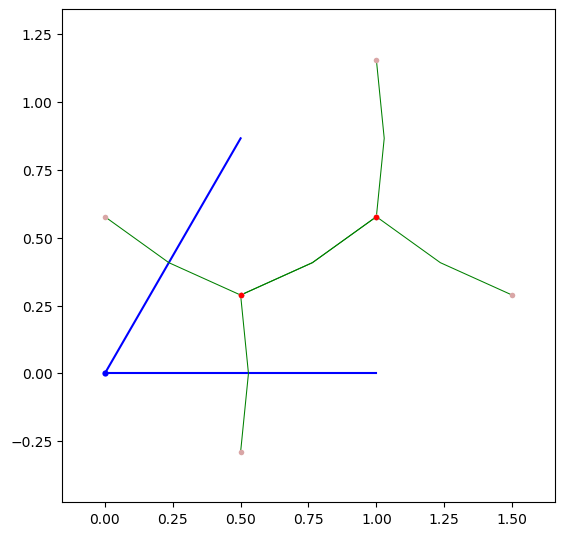

In [5]:
using PyPlot

visualize(gr,1,2); #visuzalize the lattice vector, and hopping of 2d dimensional model of graphene

### Band structure calculation

The band energies of tightbinding model is simply calculated as follow

$$
E(\mathbf{k})\phi = \hat{H}(\mathbf{k})\phi
$$

Now if we want to calculate the band structure along chosen k-point, the best thing is to sample along the symmetry point. The [symmetry point](http://lamp.tu-graz.ac.at/~hadley/ss1/bzones/hexagonal.php) of hexagonal lattice in 2dimension is 

$$
\mathbf{K}_p \in (\Gamma, K, M)
$$

where their position in reduced coordinate are

$$
\Gamma = (0,0) \quad K = (2/3,1/3) \quad M = (1/2,0)
$$

Thus the band energies along path $\Gamma \rightarrow K \rightarrow M \rightarrow \Gamma$

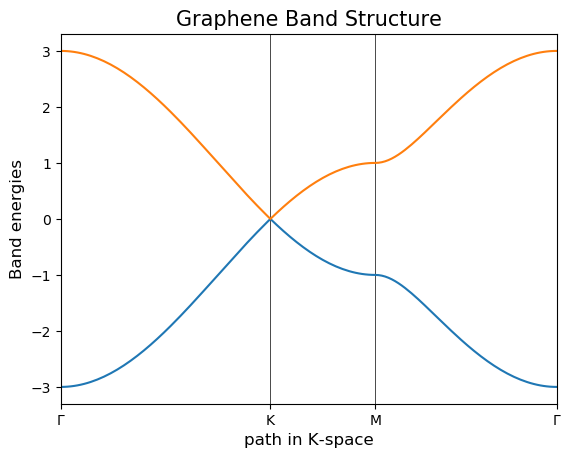

In [34]:
#kpath along symmetry point Γ -> K -> M -> Γ
kpath = [[0,0],[2/3,1/3],[1/2,0],[0,0]]
#number of kpoint
nk = 151
#generate kpoints
k_vec,k_dist,k_node = k_path(gr,kpath,nk)  #k_vec is k_vector, k_dist is distance along points, 
                                           #k_node is node of symmetry point

#now we solve the eigen energies
eigvals = solve_eig(gr,k_vec);

#plot
fig,ax = plt.subplots()
for i in 1:length(k_node)
    ax.axvline(k_node[i],linewidth=0.5,c="k")
end
ax.plot(k_dist,eigvals')
ax.set_xticks(k_node)
ax.set_xticklabels([L"\Gamma","K","M",L"\Gamma"])
ax.set_xlim(k_node[1],k_node[end])
ax.set_title("Graphene Band Structure",fontsize=15)
ax.set_xlabel("path in K-space",fontsize=12)
ax.set_ylabel("Band energies",fontsize=12);

### Density of State

Density of state calculation is straightforward

$$
\rho(\epsilon) = \sum_{k\in\text{BZ}} \delta(E(k) - \epsilon)
$$

this is simply distribution calculation of energies in Brillioun Zone.

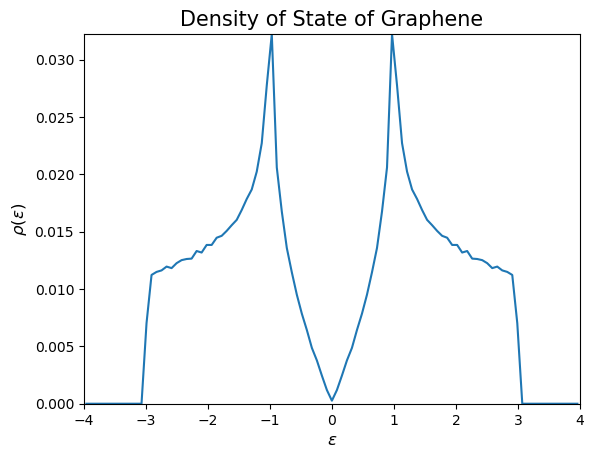

In [42]:
#compute density of state
nk = 301
w,ρ = get_DOS(gr,nk);

plot(w,ρ)
title("Density of State of Graphene",fontsize=15)
xlabel(L"\epsilon",fontsize=12)
ylabel(L"ρ(\epsilon)",fontsize=12)
ylim(minimum(ρ),maximum(ρ))
xlim(-4,4);

### Finite model

#### Nano Ribbon
For finite model, we cut the periodicity along some $x$ or $y$ direction. Suppose we want to make graphene nano-ribbon, then we cut the periodicity in $x$ direction. 

First we need to make the supercell graphene model, then cut the periodicity.

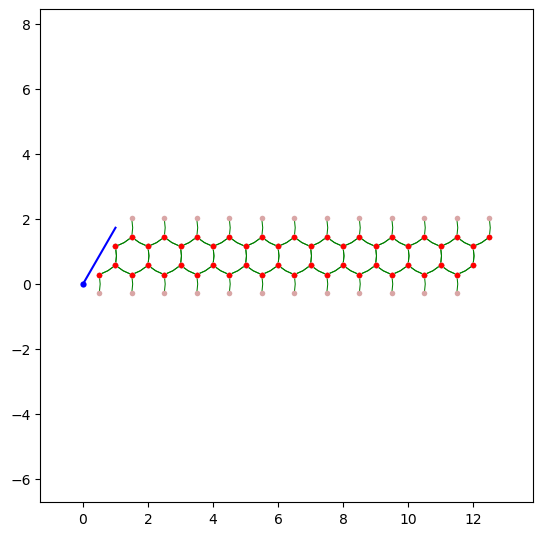

In [70]:
num_atom = 12 #number of atoms along x direction
gr_ribbon = make_supercell(gr,[[1,0],[0,2]]) #make the supercell
gr_ribbon = cut_piece(gr_ribbon,num_atom,1) #cut periodicity in x-direction
visualize(gr_ribbon,1,2);

the surface states band for this ribbon model are

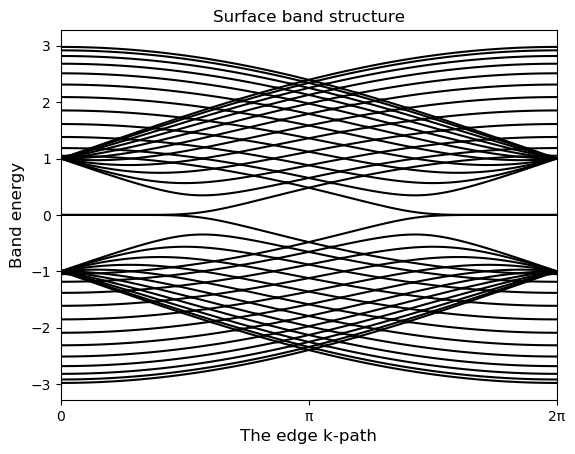

In [93]:
nk = 100
k_vec,k_dist,k_node = k_path(gr_ribbon,"full",nk) #full is full kpath along 1-dimensional ky [0,2π]
eigvals = solve_eig(gr_ribbon,k_vec);

fig,ax = subplots()
ax.plot(k_dist,eigvals',"k-")
ax.set_xlim(k_node[1],k_node[end])
ax.set_title("Surface band structure")
ax.set_ylabel("Band energy",fontsize=12)
ax.set_xlabel("The edge k-path",fontsize=12)
ax.set_xticks(k_node)
ax.set_xticklabels(["0","π","2π"]);

for full finite model, so there are no periodicity along any direction, we simply cut two_times.

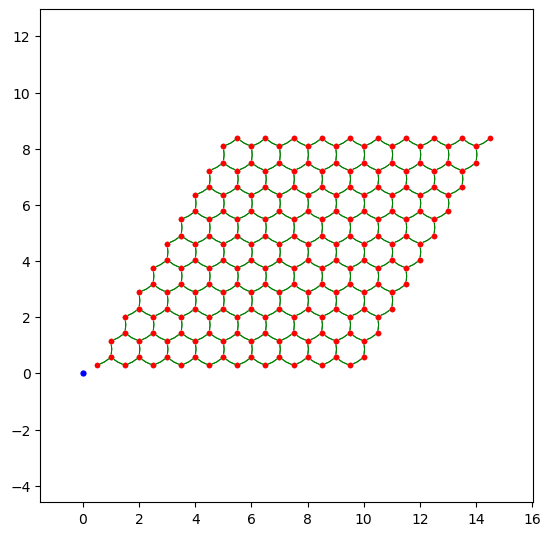

In [84]:
numx = 10 #number of atoms along x direction
numy = 10 #number of atoms along y direction
gr_finite = make_supercell(gr,[[1,0],[0,1]]) #make the supercell
gr_finite = cut_piece(gr_finite,numx,1)
gr_finite = cut_piece(gr_finite,numy,2)#cut periodicity in x-direction
visualize(gr_finite,1,2);

We cant plot the $E(k)$ because there no $k$. But we can visualize the edge state

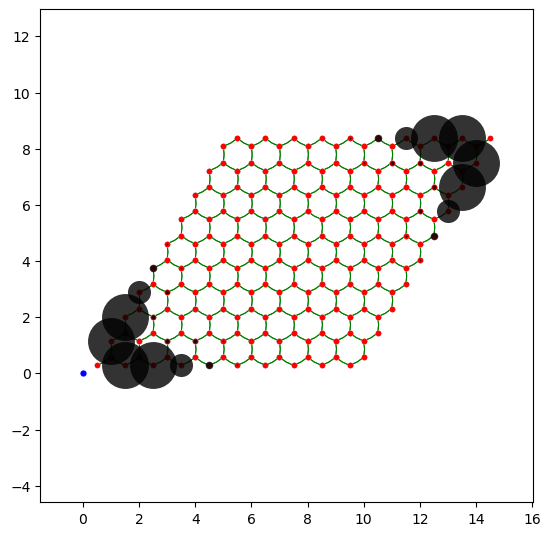

In [111]:
eigvals,eigvecs = solve_eig(gr_finite,eig_vec=true)

#index of state
index = 99
visualize(gr_finite,1,2,eig_dr=eigvecs[index,:]);